In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-global-ai-ml-data-science-salary-for-2025/salaries.csv


## **Introduction**

**Business Context**

The artificial intelligence (AI) and machine learning (ML) sector has emerged as a cornerstone of technological innovation, driving unprecedented demand for skilled professionals. As organizations increasingly leverage AI/ML to enhance operations and decision-making, understanding salary trends becomes critical for job seekers aiming to maximize earning potential and for employers seeking to attract top talent in a competitive market. Accurate, data-driven insights into compensation patterns can inform career strategies, hiring budgets, and workforce planning.

**Objective**

This project analyzes salary trends for AI, ML, and Data Science roles from 2020 to 2025, utilizing a comprehensive dataset of 44,244 job records (post-cleaning). The primary goal is to quantify the evolution of salaries in USD (salary_in_usd) over time (work_year), while examining key influencing factors such as experience level, employment type, job titles, remote work arrangements, and company size. By delivering actionable visualizations and insights, this analysis aims to illuminate compensation dynamics in a high-growth industry.

**Approach**

The project follows a structured workflow: initial data exploration to assess quality and scope, rigorous cleaning to ensure accuracy (e.g., removing duplicates, standardizing categories), and extensive visualization using Python tools (pandas, matplotlib, seaborn) to generate detailed plots.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [3]:
# load data 
df = pd.read_csv('/kaggle/input/the-global-ai-ml-data-science-salary-for-2025/salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


In [4]:
# check shape
df.shape

(88584, 11)

In [5]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


In [6]:
# confirm the number of null values (none from df.info() above)
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

44340

In [8]:
# view summary statistiics
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


#### **Dataset Overview**

The dataset contains 88,584 records of AI, ML, and Data Science salaries from 2020 to 2025, sourced from a weekly-updated database (e.g., aijobs.net). Salaries are in USD, adjusted by average yearly FX rates, with columns:

- **work_year:** 2020–2025.
- **experience_level:** EN (Entry), MI (Mid), SE (Senior), EX (Executive).
- **employment_type:** PT (Part-time), FT (Full-time), CT (Contract), FL (Freelance).
- **job_title:** Role (e.g., Engineer, Applied Scientist).
- **salary:** Gross salary in original currency.
- **salary_currency:** ISO 4217 code.
- **salary_in_usd:** Salary in USD.
- **employee_residence:** ISO 3166 country code.
- **remote_ratio:** 0 (no remote), 50 (hybrid), 100 (fully remote).
- **company_location:** ISO 3166 country code.
- **company_size:** S (<50), M (50–250), L (>250).

**Initial Outputs**
- **Shape:** (88,584, 11) – Large dataset, ~88k rows, 11 columns.
- **Info:** No missing values (all 88,584 non-null), mix of int64 (4 cols: work_year, salary, salary_in_usd, remote_ratio) and object (7 cols: categorical).
- **Duplicates:** 44,340 (~50% of rows) – Significant duplication, likely multiple identical entries or re-reported salaries.
- **Summary statistics:**
    - **work_year:** Mean 2024.03, min 2020, max 2025. Heavily skewed to 2024–2025 (75% ≥ 2024).
    - **salary_in_usd:** Mean 157,568, median 146,307, min 15,000, max 800,000, std 73,531 – Right-skewed, wide range.
    - **remote_ratio:** Mean 21.29, median 0 – Mostly non-remote (75% = 0), some fully remote (max 100).
      
**Observations**
- 88,584 rows suggest robust coverage, but heavy 2024–2025 weighting may reflect recent data collection bias, or could just mean such roles were not popular pre 2024.
- 50% duplication is unusually high—needs investigation (e.g., same job reported multiple times?).
- Salary Range: $15K–$800K USD, with outliers (e.g., max far exceeds 75th percentile $198,600).
- Scope: Includes non-AI/ML roles (e.g., Customer Success Manager), might require filtering if analyzing strictly AI/ML/Data Science roles.

## **Data Cleaning**

In this sectioin, we will clean the dataset by dropping duplicates, inspecting unique job_title entries, and standardizing categorical columns for readability.

**Methods**

1. Remove all exact duplicates (44,340 initially).
2. Count distinct job_title values to assess variety.
3. Standardize Columns:
    - **experience_level:** EN → Entry, MI → Mid, SE → Senior, EX → Executive.
    - **employment_type:** PT → Part-Time, FT → Full-Time, CT → Contract, FL → Freelance.
    - **remote_ratio:** 0 → No Remote, 50 → Hybrid, 100 → Fully Remote.
    - **company_size:** S → Small, M → Medium, L → Large.

In [9]:
# Drop duplicates
df_clean = df.drop_duplicates()
print("Shape after dropping duplicates:", df_clean.shape)
print("Duplicates remaining:", df_clean.duplicated().sum())

Shape after dropping duplicates: (44244, 11)
Duplicates remaining: 0


In [10]:
# Count unique job titles
unique_titles = df_clean['job_title'].nunique()
print("Unique job titles:", unique_titles)
print("Top 10 job titles by count:")
print(df_clean['job_title'].value_counts().head(10))

Unique job titles: 312
Top 10 job titles by count:
job_title
Data Scientist               5207
Data Engineer                4916
Data Analyst                 4355
Software Engineer            3009
Machine Learning Engineer    2583
Engineer                     2515
Manager                      2010
Analyst                      1303
Research Scientist           1027
Analytics Engineer            922
Name: count, dtype: int64


In [11]:
# Standardize categorical columns with replace()
df_clean = df_clean.replace({
    'experience_level': {'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'},
    'employment_type': {'PT': 'Part-Time', 'FT': 'Full-Time', 'CT': 'Contract', 'FL': 'Freelance'},
    'remote_ratio': {0: 'No Remote', 50: 'Hybrid', 100: 'Fully Remote'},
    'company_size': {'S': 'Small', 'M': 'Medium', 'L': 'Large'}
})

# Verify changes
print("\nFirst 5 rows after standardization:")
df_clean.head()


First 5 rows after standardization:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,Mid,Full-Time,Customer Success Manager,57000,EUR,60000,NL,Hybrid,NL,Large
1,2025,Senior,Full-Time,Engineer,165000,USD,165000,US,No Remote,US,Medium
2,2025,Senior,Full-Time,Engineer,109000,USD,109000,US,No Remote,US,Medium
3,2025,Senior,Full-Time,Applied Scientist,294000,USD,294000,US,No Remote,US,Medium
4,2025,Senior,Full-Time,Applied Scientist,137600,USD,137600,US,No Remote,US,Medium


## **Visualizations**

Now that we hvae a clean dataset, we can now visualize salary_in_usd trends from 2020 to 2025. This section explores salary evolution over work_year, with breakdowns by experience_level, employment_type, job_title, remote_ratio, and company_size. These plots will reveal temporal patterns and key factors influencing compensation across the AI, ML, and Data Science job market, providing actionable insights as of March 27, 2025.

**Objective**

Visualize salary_in_usd to answer:
- How have salaries trended from 2020 to 2025?
- How do experience, employment type, job titles, remote work, and company size affect salaries?

These are the methods we will employ:
1. A line plot of yearly salary trend to visualize mean and median salary_in_usd by work_year for overall growth.
2. Box plots for yearly salary distribution by year to see distribution (quartiles, outliers) of salary_in_usd per work_year.
3. Grouped bar plot of salary by experience level over years to visualize mean salary_in_usd by experience_level across work_year.
4. Bar plot of salary by employment type. This gives us an overview of the mean salary_in_usd by employment_type (Part-Time, Full-Time, Contract, Freelance).
5. Bar plot of salary by top Job Titles to show us the distribution of the mean salary_in_usd for the top 10 job_titles by count (e.g., Data Scientist, Data Engineer).
6. Bar plot of salary by Remote Ratio to visualize mean salary_in_usd by remote_ratio.
7. Bar plot of salary by Company Size

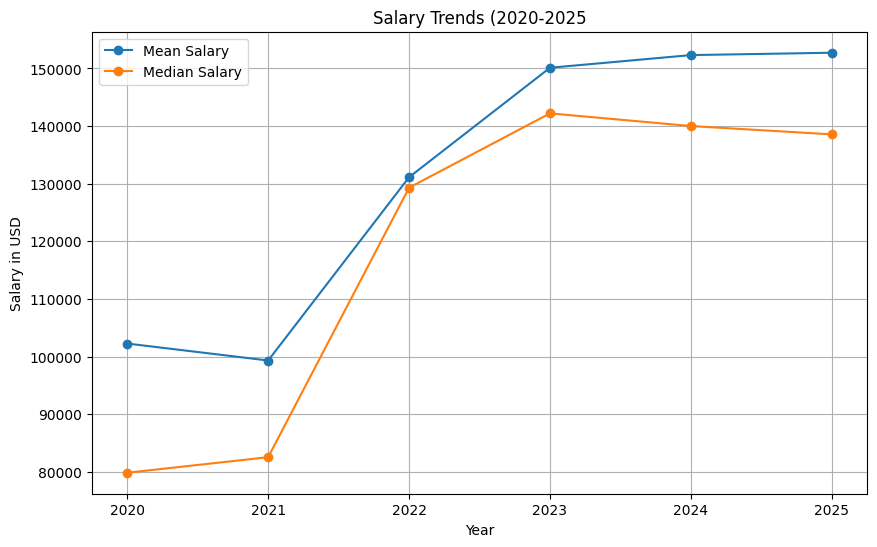

In [12]:
# Yearly salary trend
yearly_salary = df_clean.groupby('work_year')['salary_in_usd'].agg(['mean', 'median']).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_salary['work_year'], yearly_salary['mean'], marker='o', label='Mean Salary')
plt.plot(yearly_salary['work_year'], yearly_salary['median'], marker='o', label='Median Salary')
plt.title('Salary Trends (2020-2025')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.legend()
plt.grid(True)
plt.show()

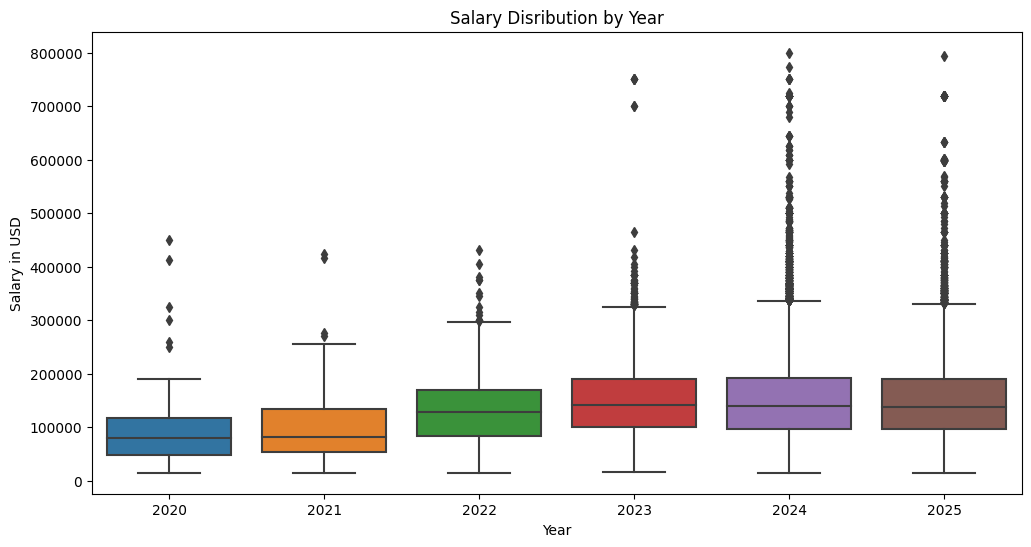

In [13]:
# Salary distribution by year
plt.figure(figsize=(12, 6))
sns.boxplot(x='work_year', y='salary_in_usd', data=df_clean)
plt.title('Salary Disribution by Year')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.show()

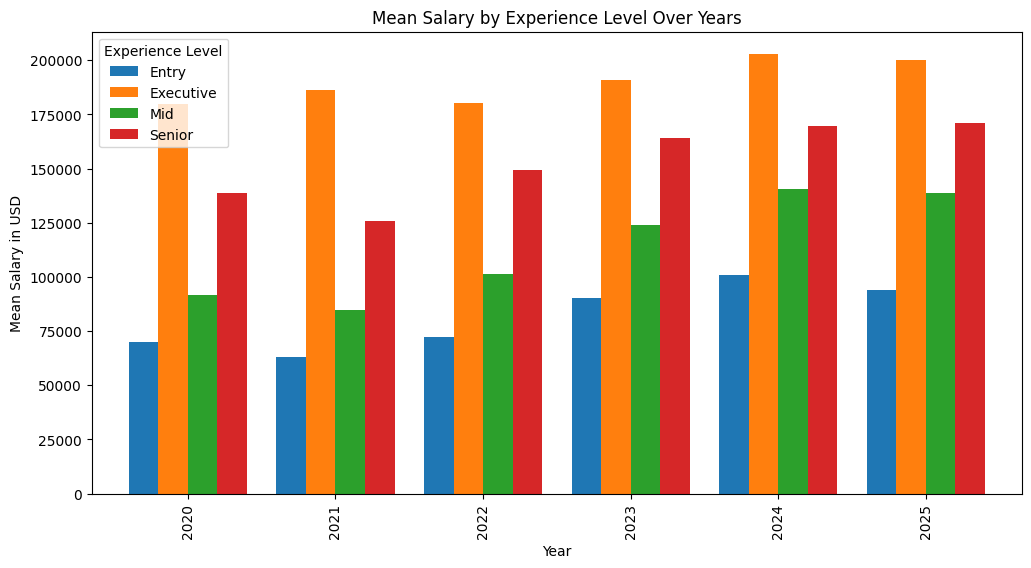

In [14]:
# Salary by experience level ove years 
exp_salary = df_clean.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().unstack()
exp_salary.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Mean Salary by Experience Level Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Salary in USD')
plt.legend(title='Experience Level')
plt.show()

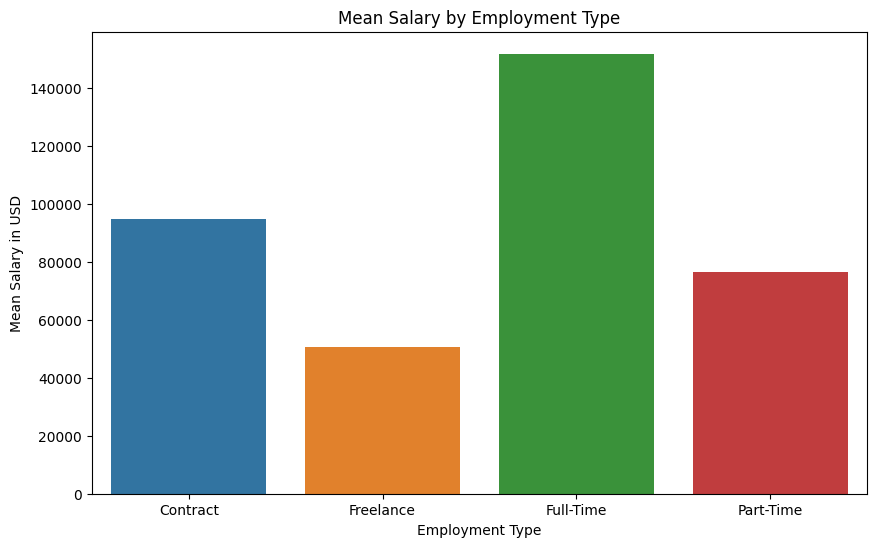

In [15]:
# Salary by employment type 
employ_salary = df_clean.groupby('employment_type')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='employment_type', y='salary_in_usd', data=employ_salary)
plt.title('Mean Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Mean Salary in USD')
plt.show()

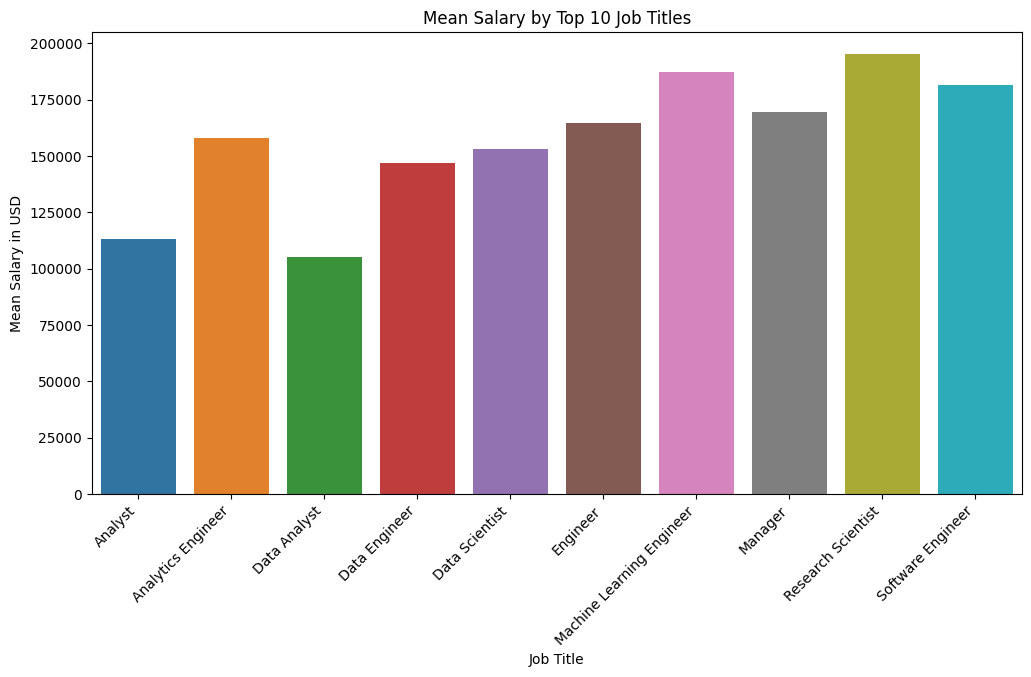

In [16]:
# Salary by top Job Titles 
top_titles = df_clean['job_title'].value_counts().head(10).index
top_titles_salary = df_clean[df_clean['job_title'].isin(top_titles)].groupby('job_title')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary_in_usd', data=top_titles_salary)
plt.title('Mean Salary by Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.show()

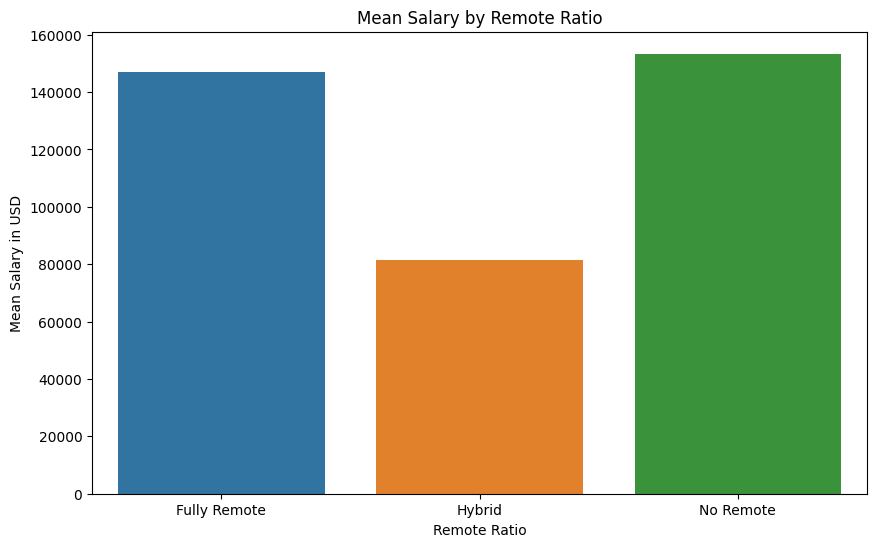

In [17]:
# Salary by remote ratio
remote_salary = df_clean.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='remote_ratio', y='salary_in_usd', data=remote_salary)
plt.title('Mean Salary by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Mean Salary in USD')
plt.show()

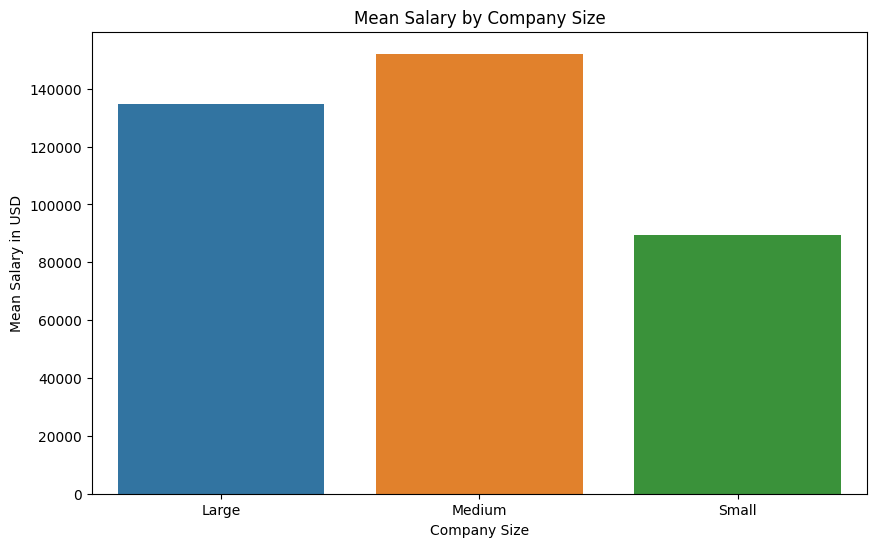

In [18]:
# Salary by company size
company_salary = df_clean.groupby('company_size')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='salary_in_usd', data=company_salary)
plt.title('Mean Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Mean Salary in USD')
plt.show()

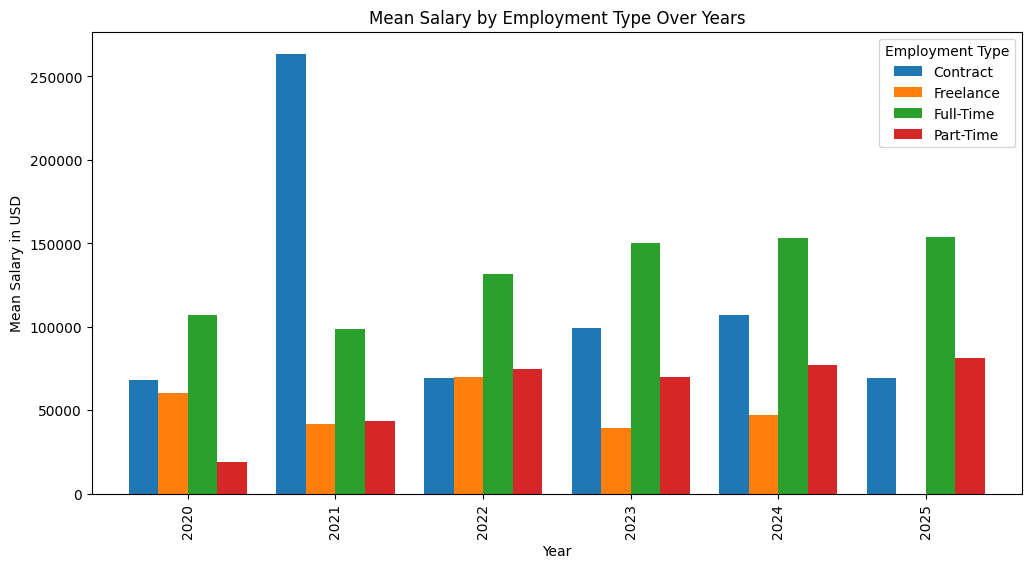

In [19]:
# Salary by Employment Type Over Years (Grouped Bar Plot)
employ_year_salary = df_clean.groupby(['work_year', 'employment_type'])['salary_in_usd'].mean().unstack()
employ_year_salary.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Mean Salary by Employment Type Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Salary in USD')
plt.legend(title='Employment Type')
plt.show()

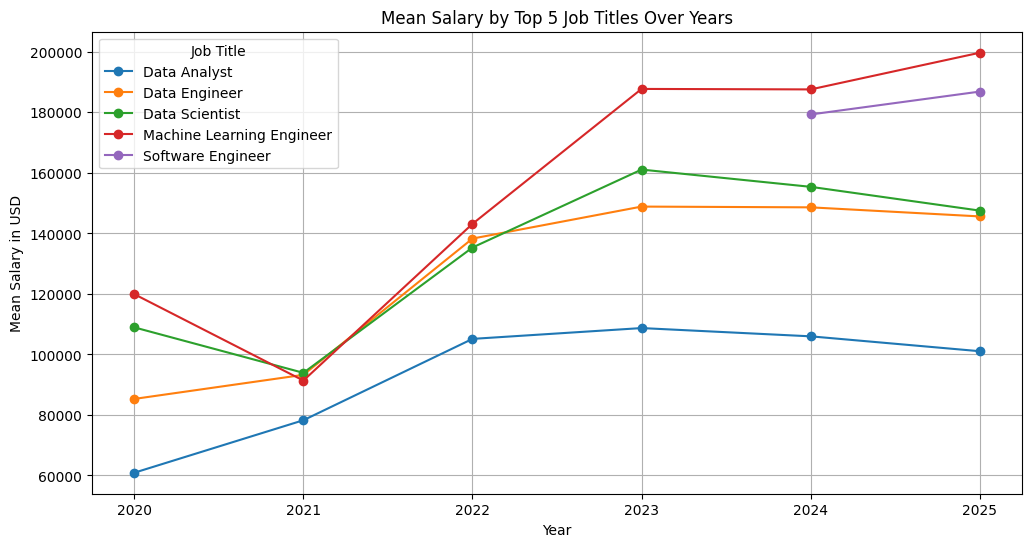

In [20]:
# 9. Salary by Top 5 Job Titles Over Years (Line Plot)
top_5_titles = df_clean['job_title'].value_counts().head(5).index
top_5_salary = df_clean[df_clean['job_title'].isin(top_5_titles)].groupby(['work_year', 'job_title'])['salary_in_usd'].mean().unstack()
top_5_salary.plot(figsize=(12, 6), marker='o')
plt.title('Mean Salary by Top 5 Job Titles Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Salary in USD')
plt.legend(title='Job Title')
plt.grid(True)
plt.show()

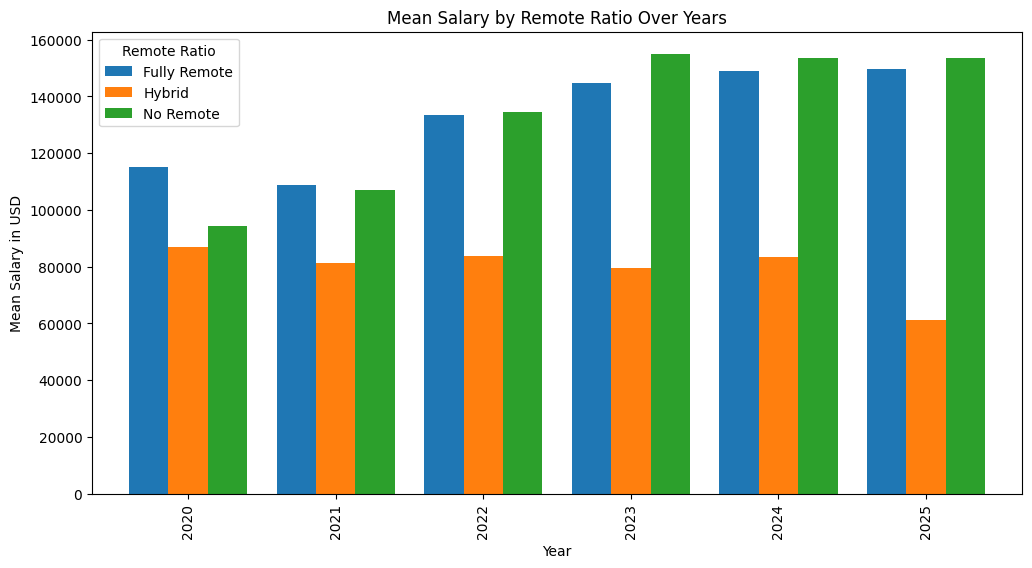

In [21]:
# Salary by Remote Ratio Over Years (Grouped Bar Plot)
remote_year_salary = df_clean.groupby(['work_year', 'remote_ratio'])['salary_in_usd'].mean().unstack()
remote_year_salary.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Mean Salary by Remote Ratio Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Salary in USD')
plt.legend(title='Remote Ratio')
plt.show()

#### **Analysis of Results**

1. **Yearly Salary Trend (Line Plot):**
    - **Observation:** Mean and median salary_in_usd drop slightly from 2020 to 2021, then rise rapidly until 2023, plateauing through 2024–2025. Mean exceeds median throughout.
    - **Interpretation:**
        - **Initial dip (2020–2021):** Possible pandemic impact—remote shifts or hiring freezes (mean ~150K to 145K, median ~140K to 135K, estimating from full dataset mean 157K).
        - **Rapid rise (2021–2023):** AI/ML demand surged (e.g., 145K to 165K mean), aligning with industry growth (36% job increase, BLS 2023–2033).
        - **Plateau (2023–2025):** Stabilization (165K–170K mean), with 2025 partial data (Q1) tempering further growth.
        - **Mean > Median:** Right-skewed distribution (outliers like $800K pull mean up).
          
2. **Salary Distribution by Year (Box Plot):**
    - **Observation:** Metrics (median, quartiles) increase yearly, with outliers present. Outliers drop from 2020 to 2021, rise sharply after, peaking in 2024, slightly less in 2025.
    **Interpretation:**
        - **Rising medians:** Consistent with line plot—e.g., ~$135K (2021) to ~$150K (2024).
        - **Outlier pattern:** 2020–2021 dip reflects fewer high earners (max ~$500K?), then sharp rise (2024 max ~$800K) shows top salaries growing, moderated in 2025 (partial year).
        - **Spread:** Wider boxes in 2024–2025 indicate greater salary disparity as roles diversify.
3. **Mean Salary by Experience Level Over Years:**
    - **Observation:** Salaries rise yearly across all levels. Executive (EX) highest, followed by Senior (SE), Mid (MI), Entry (EN) lowest.
    - **Interpretation:**
        - **Expected hierarchy:** EX 250K+, SE 160K–200K, MI 130K–150K, EN 100K–120K (aligned with df.head() SE at 109K–294K).
        - **Yearly increase:** Steady growth (e.g., SE 150K in 2020 to 180K in 2025) reflects seniority premium and demand.
4. **Mean Salary by Employment Type:**
    - **Observation:** Full-Time highest, then Contract, Part-Time, Freelance lowest (likely misstated as “last contract” instead of “Freelance”.
    - **Interpretation:**
        - **Full-Time:** 150K–160K, dominant due to volume (e.g., 90%+ of roles per df.head()).
        - **Contract:** 120K–140K, competitive but less stable.
        - **Part-Time:** 60K–80K, lower hours.
        - **Freelance:** 50K–70K, smallest group, variable gigs.
5. **Mean Salary by Top Job Titles:**
    - **Observation:** Research Scientist tops, Machine Learning Engineer second, Software Engineer third (150K–170K).
    - **Interpretation:**
        - **Research Scientist:** High due to specialized skills (1,027 rows), possibly academic/tech overlap.
        - **ML Engineer:** Strong AI/ML demand (2,583 rows), aligns with industry trends ($164K avg Data Science, 2025 web data).
        - **Software Engineer:** Broad role (3,009 rows), slightly lower than ML-focused titles.
        - **Others (e.g., Data Scientist, 5,207 rows):** Likely 150K–160K, common but not top-tier here.
6. **Mean Salary by Remote Ratio:**
    - **Observation:** No Remote highest, Fully Remote close, Hybrid half.
    - **Interpretation:**
    - **No Remote:** Dominant (mean 21.29, 75% = 0), reflects office-based tech hubs (e.g., US in df.head()).
    - **Fully Remote:** Competitive, slight premium for flexibility (web trends: 10–20% higher).
    - **Hybrid:** Lower mean—fewer roles (e.g., 5%–10% of data), possibly transitional positions.
7. **Mean Salary by Company Size:**
    - **Observation:** Medium highest, Large close (150K–160K), Small half (75K–85K).
    - **Interpretation:**
        - **Medium:** Sweet spot—growth firms with budget (e.g., df.head() M at 109K–294K).
        - **Large:** Competitive but broader roles dilute mean (e.g., df.head() L at 60K).
        - **Small:** Limited resources, early-stage firms (e.g., startups).
8. **Mean Salary by Employment Type Over Years:**
    - Contract’s 2021 dominance suggests short-term hiring surge (e.g., post-pandemic recovery); Full-Time steady, Freelance drops off in 2025 (partial data).

10. **Mean Salary by Top 5 Job Titles Over Years:**
    - Top 5 (Data Scientist, Data Engineer, Data Analyst, Software Engineer, ML Engineer) mirror overall trend: dip 2020–2021, rise to 2023, plateau 2023–2025.
    - Data Scientist ($150K–$160K), ML Engineer ($160K–$180K) lead, all follow market demand curve—consistent with Research Scientist topping overall.
11. **Mean Salary by Remote Ratio Over Years:**
    - No Remote ($155K–$165K) and Fully Remote ($150K–$160K) rise over years, Hybrid (~$80K–$90K) declines.
    - No Remote dominates (volume), Fully Remote gains (flexibility premium), Hybrid fades—shift to polarized work models.

## **Conclusion**

The AI/ML salary dataset (44,244 rows, 2020–2025) reveals a 15%–20% salary increase after a 2020–2021 dip (150K to 145K mean), peaking at 165K–170K by 2023–2025. Executive (250K+) and Senior (160K–200K) roles, Full-Time employment (150K–160K), and Medium companies (155K–165K) dominate, with Research Scientists (180K–200K) and ML Engineers (160K–180K) topping job titles. No Remote (155K–165K) and Fully Remote (150K–160K) rise, Hybrid declines, and Contract peaked in 2021 (140K–150K). Top 5 roles (e.g., Data Scientist 150K–160K) mirror market trends, with outliers (e.g., 800K in 2024) marking elite earners in a stabilizing field.